In [1]:
import pandas as pd
import os

## Read in the data

In [2]:
base_path = "/workdir/lyx/work/inception/"

In [3]:
relevant_documents = pd.read_csv(os.path.join(base_path, "Data", "relevant_documents.csv"))

In [4]:
data = relevant_documents[["doc_id", "drivers", "pollutants", "region", "country"]]

In [5]:
data

doc_id                drivers               pollutants         region  \
0           1            Wet and Dry                Not Found  North America   
1           2            Wet and Dry                Not Found         Europe   
2           3              Not Found                Not Found           Asia   
3           4          Heat and Cold                       O3      Not Found   
4           6          Heat and Cold                Not Found      Not Found   
...       ...                    ...                      ...            ...   
11669  426640                Coastal                Not Found      Not Found   
11670  426984     Coastal;Open Ocean                Not Found         Europe   
11671  427904  Heat and Cold;Coastal                  Nitrate         Europe   
11672  427946                Coastal                  Nitrate           Asia   
11673  428077              Not Found  Dust;Sulfate;Nitrate;PM         Europe   

         country  
0            USA  
1            NaN  
2            CHN  
3      Not Found  
4      Not Found  
...          ...  
11669  Not Found  
11670        GBR  
11671        PRT  
11672        CHN  
11673        ESP  

[11674 rows x 5 columns]

In [6]:
all_relevant_sum = len(data)

In [7]:
climate_factors_list = pd.read_csv(os.path.join(base_path, "Data", "climate_factors_list.csv"))
air_pollutants_list = pd.read_csv(os.path.join(base_path, "Data", "air_pollutants_list.csv"))

In [8]:
region_list = [
    "Africa",
    "Asia",
    "Europe",
    "North America",
    "South America",
    "Oceania",
    "Antarctica"
]

In [9]:
driver_list = list(climate_factors_list["name"])
pollutant_list = list(air_pollutants_list["name"])

label = driver_list + pollutant_list

## Data Statistics

In [10]:
def gen_pair_data(source_list, target_list, source_field, target_field, data):
    pair_data = pd.DataFrame(columns=["source", "target", "value"])
    for source in source_list:
        for target in target_list:
            pair_data = pd.concat([pair_data, pd.DataFrame([[source, target, 0]], columns=["source", "target", "value"])])
    
    for i, row in data.iterrows():
        if isinstance(row[source_field], str) and isinstance(row[target_field], str):
            sources = row[source_field].split(';')
            targets = row[target_field].split(';')
            for source in sources:
                if source.lower() == "not mentioned" or source.lower() == "not found":
                    continue
                else:
                    for target in targets:
                        if target.lower() == "not mentioned" or target.lower() == "not found":
                            continue
                        pair_data.loc[(pair_data["source"] == source) & (pair_data["target"] == target), "value"] += 1
    
    return pair_data

In [11]:
def gen_count(field, data):
    item_count = {}
    for i, row in data.iterrows():
        if isinstance(row[field], str):
            items = row[field].split(';')
            for item in items:
                if item.lower() == "not mentioned" or item.lower() == "not found":
                    continue
                item_count[item] = item_count.get(item, 0) + 1
    item_count = pd.DataFrame.from_dict(item_count, orient='index', columns=['count'])
    # turn index into column
    item_count.reset_index(level=0, inplace=True)
    item_count.rename(columns={'index': 'name'}, inplace=True)
    # sort by count
    item_count = item_count.sort_values(by=['count'], ascending=False)
    return item_count

In [12]:
pair_data_cli_pol = gen_pair_data(driver_list, pollutant_list, "drivers", "pollutants", data)

In [13]:
pair_data_cli_pol

source   target value
0   Heat and Cold       CO   610
0   Heat and Cold       Pb    64
0   Heat and Cold      NO2   688
0   Heat and Cold       O3  1948
0   Heat and Cold       BC   383
..            ...      ...   ...
0       Radiation     Dust   278
0       Radiation  Sulfate   103
0       Radiation  Nitrate    45
0       Radiation       PM   279
0       Radiation      SO2   118

[80 rows x 3 columns]

In [14]:
driver_count = gen_count("drivers", data)
pollutant_count = gen_count("pollutants", data)

In [15]:
driver_list = list(driver_count["name"])
pollutant_list = list(pollutant_count["name"])

## Plot the data

In [16]:
# color_node_origin = px.colors.qualitative.Dark24 + px.colors.qualitative.Plotly + px.colors.qualitative.G10 + px.colors.qualitative.Light24
# color_node_origin = px.colors.qualitative.Light24

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Bar plot and pie plot

In [18]:
plaette = sns.color_palette("hls", len(driver_count) + len(pollutant_count))
driver_color = plaette[:len(driver_count)]
pollutant_color = plaette[len(driver_count):]

In [19]:
plaette

[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.5445333333333333, 0.33999999999999997),
 (0.86, 0.7178666666666667, 0.33999999999999997),
 (0.8287999999999999, 0.86, 0.33999999999999997),
 (0.6554666666666664, 0.86, 0.33999999999999997),
 (0.48213333333333297, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.3712),
 (0.33999999999999997, 0.86, 0.5445333333333332),
 (0.33999999999999997, 0.86, 0.7178666666666667),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.6554666666666664, 0.86),
 (0.33999999999999997, 0.48213333333333336, 0.86),
 (0.3712, 0.33999999999999997, 0.86),
 (0.5445333333333334, 0.33999999999999997, 0.86),
 (0.7178666666666661, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.8287999999999999),
 (0.86, 0.33999999999999997, 0.6554666666666664),
 (0.86, 0.33999999999999997, 0.48213333333333297)]

In [20]:
# LMM的色板
# driver色板（8个）
# driver_color_list = ["#f94144", "#f3722c", "#f8961e", "#f9844a", "#f9c74f", "#90be6d", "#43aa8b", "#4d908e"]
# driver_color_list = ["#355070", "#515575", "#6d597a", "#915f78", "#b56576", "#e56b6f", "#e88c7d", "#eaac8b"]
driver_color_list = ['#EE8866', '#44BB99', '#77AADD', '#AAAA00','#FFAABB', '#9B8AC4','#EEDD88','#99DDFF']

driver_color_dic = {
    'Heat and Cold': driver_color_list[0],
    'Wind': driver_color_list[1],
    'Wet and Dry': driver_color_list[2],
    'Coastal': driver_color_list[3],
    'Radiation': driver_color_list[4],
    'Air pollution weather': driver_color_list[5],
    'Open Ocean': driver_color_list[6],
    'Snow and Ice': driver_color_list[7],
}

driver_color = sns.color_palette(driver_color_list)
driver_color

[(0.9333333333333333, 0.5333333333333333, 0.4),
 (0.26666666666666666, 0.7333333333333333, 0.6),
 (0.4666666666666667, 0.6666666666666666, 0.8666666666666667),
 (0.6666666666666666, 0.6666666666666666, 0.0),
 (1.0, 0.6666666666666666, 0.7333333333333333),
 (0.6078431372549019, 0.5411764705882353, 0.7686274509803922),
 (0.9333333333333333, 0.8666666666666667, 0.5333333333333333),
 (0.6, 0.8666666666666667, 1.0)]

In [21]:
# pollutant色板（10个）
# pollutant_color_list = ["#f94144", "#f3722c", "#f8961e", "#f9844a", "#f9c74f", "#90be6d", "#43aa8b", "#4d908e", "#577590", "#277da1"]
# pollutant_color_list = ["#65010C", "#033270", "#CB1B16", "#1368AA", "#EF3C2D", "#4091C9", "#F26A4F", "#9DCEE2", "#F29479", "#FEDFD4"]
pollutant_color_list = ["#117733", "#EE7733", "#004488", "#88CCEE", "#44AA99", "#DDCC77", "#CC6677", "#882255","#AA4499", "#666666"]

pollutant_color_dic = {
    'PM': pollutant_color_list[0],
    'O3': pollutant_color_list[1],
    'NO2': pollutant_color_list[2],
    'SO2': pollutant_color_list[3],
    'CO': pollutant_color_list[4],
    'Dust': pollutant_color_list[5],
    'Sulfate': pollutant_color_list[6],
    'BC': pollutant_color_list[7],
    'Nitrate': pollutant_color_list[8],
    'Pb': pollutant_color_list[9],
}

pollutant_color = sns.color_palette(pollutant_color_list)
pollutant_color

[(0.06666666666666667, 0.4666666666666667, 0.2),
 (0.9333333333333333, 0.4666666666666667, 0.2),
 (0.0, 0.26666666666666666, 0.5333333333333333),
 (0.5333333333333333, 0.8, 0.9333333333333333),
 (0.26666666666666666, 0.6666666666666666, 0.6),
 (0.8666666666666667, 0.8, 0.4666666666666667),
 (0.8, 0.4, 0.4666666666666667),
 (0.5333333333333333, 0.13333333333333333, 0.3333333333333333),
 (0.6666666666666666, 0.26666666666666666, 0.6),
 (0.4, 0.4, 0.4)]

In [22]:
# 手动指定每个大洲的颜色
region_color = ["#f9c74f", "#577590", "#43aa8b", "#90be6d", "#f3722c", "#f94144"]
region_color_dict = {
    'Oceania': region_color[0],
    'South America': region_color[1],
    'Africa': region_color[2],
    'North America': region_color[3],
    'Europe': region_color[4],
    'Asia': region_color[5],
}
region_list = list(region_color_dict.keys())

In [23]:
sns.set(font='sans-serif', style="white")

In [24]:
def draw_bar_pie(data, plaette, title, sum=None):
    # plaette can be a dict, if so, use the value of the dict as the color
    if isinstance(plaette, dict):
        new_plaette = []
        for i, row in data.iterrows():
            new_plaette.append(plaette[row["name"]])
        plaette = new_plaette
    fig, axs = plt.subplots(1, 1, figsize=(10, 6), tight_layout=True)
    # fig.suptitle(title)
    sns.barplot(x="count", y="name", data=data, ax=axs, palette=plaette)
    # bar label is the percentage of the total
    if sum is None:
        sumvalue = data["count"].sum()
    else:
        sumvalue = sum
    for p in axs.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width() / sumvalue)
        x = p.get_x() + p.get_width() / 2
        y = p.get_y() + p.get_height() / 2 + 0.1
        axs.annotate(percentage, (x, y))
    insert_axs = fig.add_axes([0.5, 0.13, 0.5, 0.5])
    insert_axs.pie(data["count"], labels=data["name"], pctdistance=None, labeldistance=None, startangle=90, colors=plaette, wedgeprops=dict(width=0.5))
    # Delete y label
    axs.set_ylabel('')
    axs.set_xlabel('Number of papers')
    plt.savefig(title + ".svg")
    plt.show()

/tmp/ipykernel_2903325/1003307193.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="name", data=data, ax=axs, palette=plaette)
/tmp/ipykernel_2903325/1003307193.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(title + ".svg")
/home/lyx/anaconda3/envs/llm-cli-air-review/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


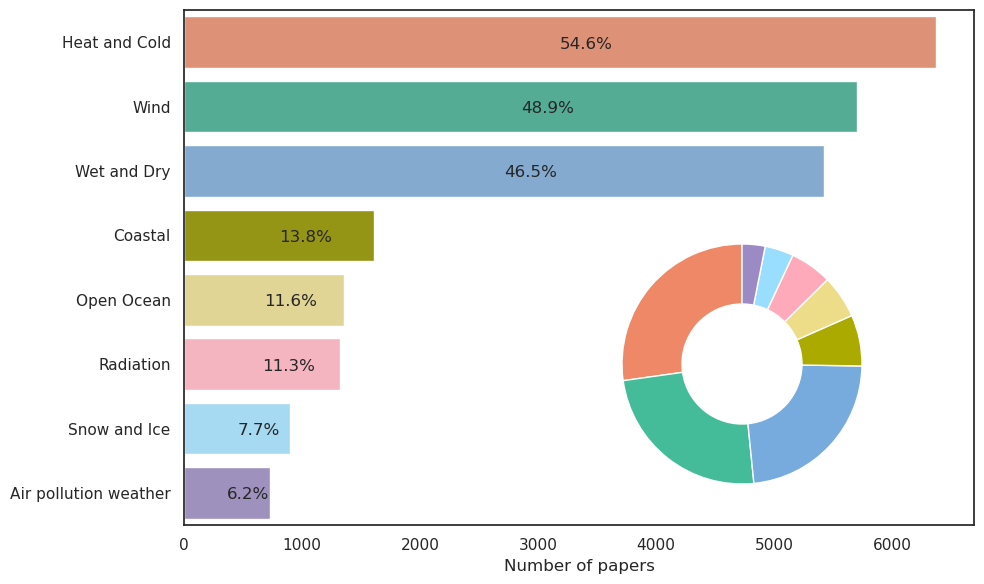

/tmp/ipykernel_2903325/1003307193.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="name", data=data, ax=axs, palette=plaette)
/tmp/ipykernel_2903325/1003307193.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(title + ".svg")
/home/lyx/anaconda3/envs/llm-cli-air-review/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


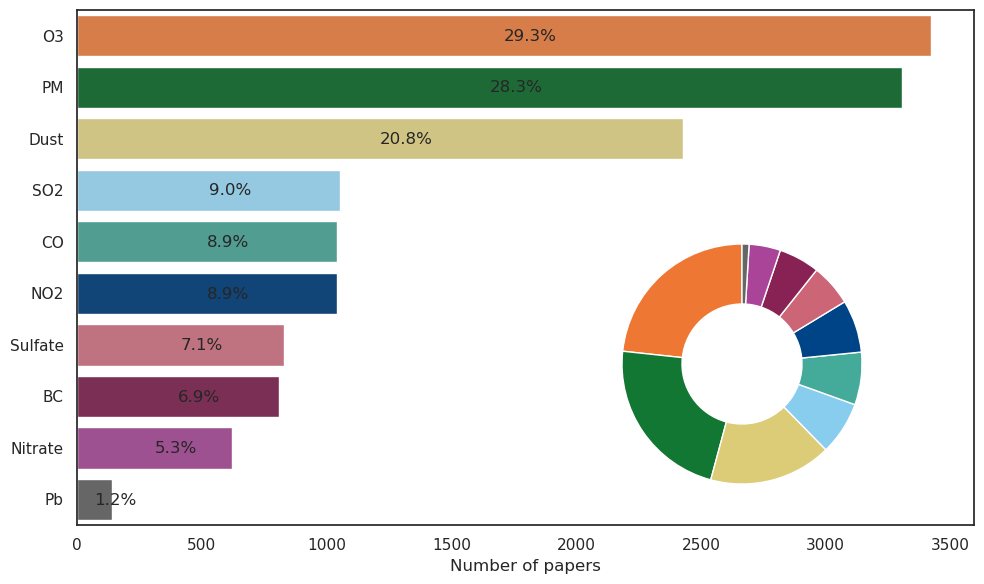

In [25]:
draw_bar_pie(driver_count, driver_color_dic, "Driver Count", sum=all_relevant_sum)
draw_bar_pie(pollutant_count, pollutant_color_dic, "Pollutant Count", sum=all_relevant_sum)

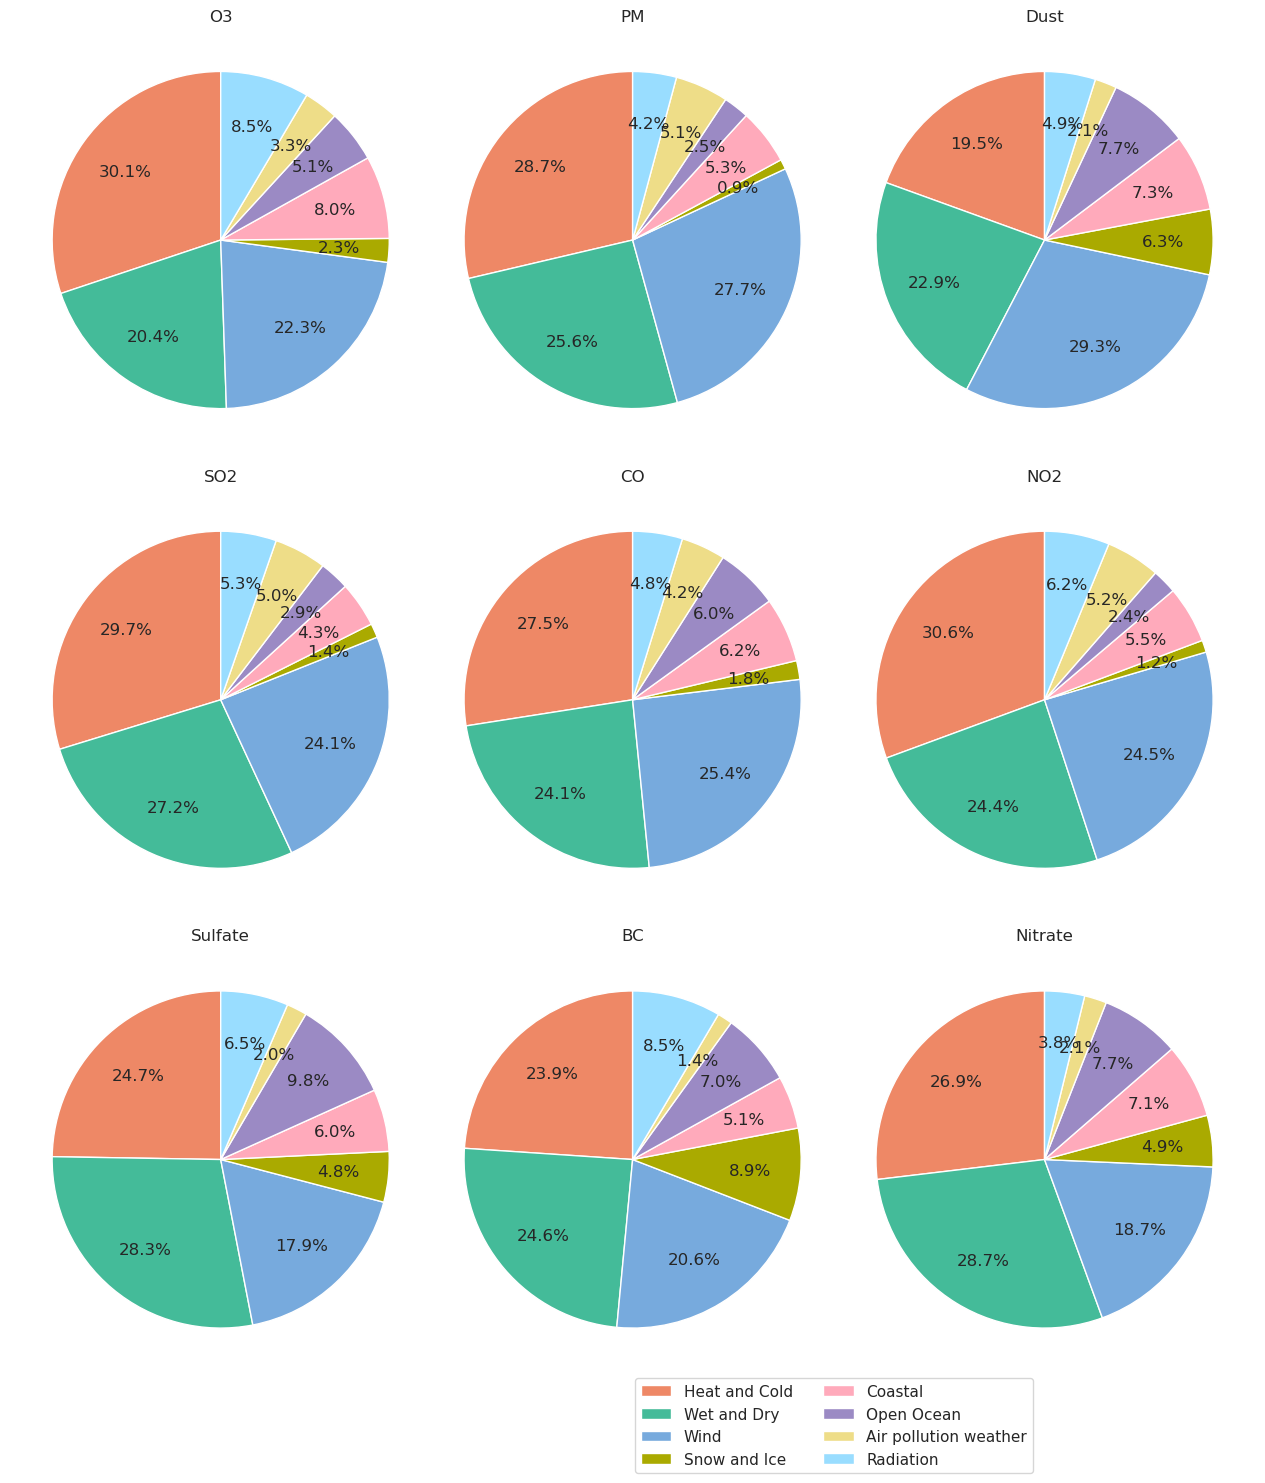

In [26]:
# 10 Subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15), tight_layout=True)
ax_count = 0
for pollutant in pollutant_list[0:9]:
    plot_data = pair_data_cli_pol[(pair_data_cli_pol["target"] == pollutant) & (pair_data_cli_pol["source"].isin(driver_list))]
    # Draw Pie chart using plt
    colors = []
    for item in plot_data["source"]:
        colors.append(driver_color[label.index(item)])
    axs[int(ax_count/3), ax_count%3].pie(list(plot_data["value"]), labels=list(plot_data["source"]), autopct='%1.1f%%', pctdistance=0.7, startangle=90, colors=colors, labeldistance=None)
    axs[int(ax_count/3), ax_count%3].set_title(pollutant)
    ax_count += 1
# Legend在正下方
plt.legend(bbox_to_anchor=(0, 0), loc='upper center', ncol=2)
# 子图间距调整
plt.subplots_adjust(wspace=-0.8, hspace=0)
plt.show()

/tmp/ipykernel_2903325/2948700143.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


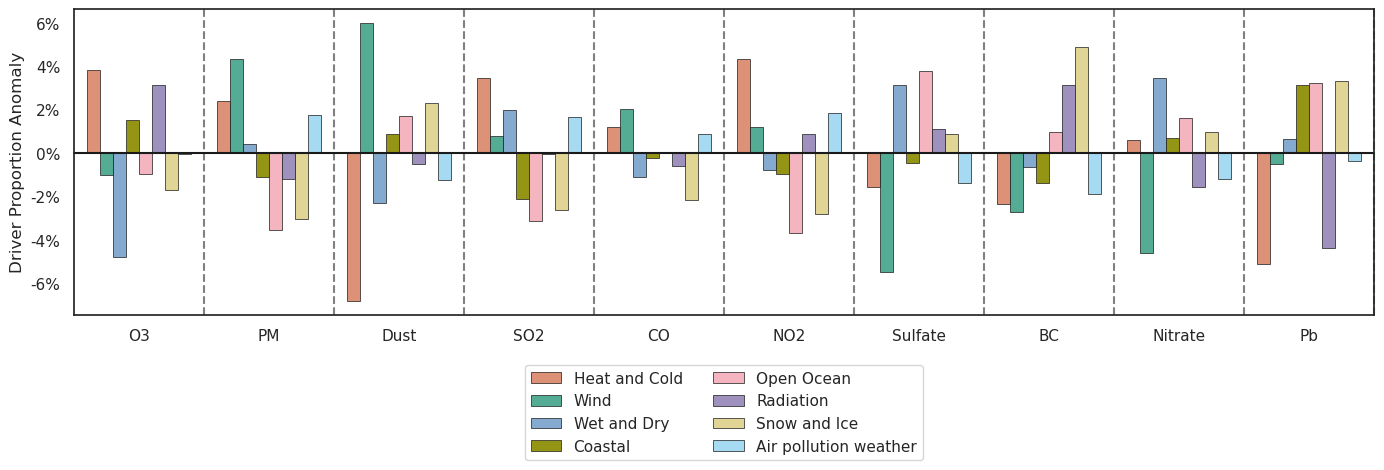

In [27]:
plot_data = pd.DataFrame(columns=["pollutant", "driver", "count"])
plot_data["count"] = plot_data["count"].astype(int)
for pollutant in pollutant_list:
    for driver in driver_list:
        count = pair_data_cli_pol[(pair_data_cli_pol["target"] == pollutant) & (pair_data_cli_pol["source"] == driver)]["value"].sum()
        plot_data = pd.concat([plot_data, pd.DataFrame([[pollutant, driver, count]], columns=["pollutant", "driver", "count"])])
plot_data["driver_percent_by_pollutant"] = plot_data["count"] / plot_data.groupby("pollutant")["count"].transform("sum")
plot_data["driver_percent_anomaly"] = plot_data["driver_percent_by_pollutant"] - plot_data.groupby("driver")["driver_percent_by_pollutant"].transform("mean")
plot_data.to_csv("driver_percent_by_pollutant.csv")

# Bar plot
fig, axs = plt.subplots(1, 1, figsize=(14, 5), tight_layout=True)

sns.barplot(x="pollutant", y="driver_percent_anomaly", hue="driver", data=plot_data, ax=axs, palette=driver_color, edgecolor="k", linewidth=0.5)
# Add vertical line to separate different pollutant
for i in range(len(pollutant_list)):
    axs.axvline(i + 0.5, color="grey", linestyle="--", clip_on=False)

# y_label format to percentage
vals = axs.get_yticks()
axs.set_yticklabels(['{:,.0%}'.format(x) for x in vals])

axs.set_ylabel('Driver Proportion Anomaly')
axs.axhline(0, color="k", clip_on=False)
axs.legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.5))
axs.set_xlabel('')

plt.savefig("Driver_Proportion_Anomaly.svg")
plt.show()

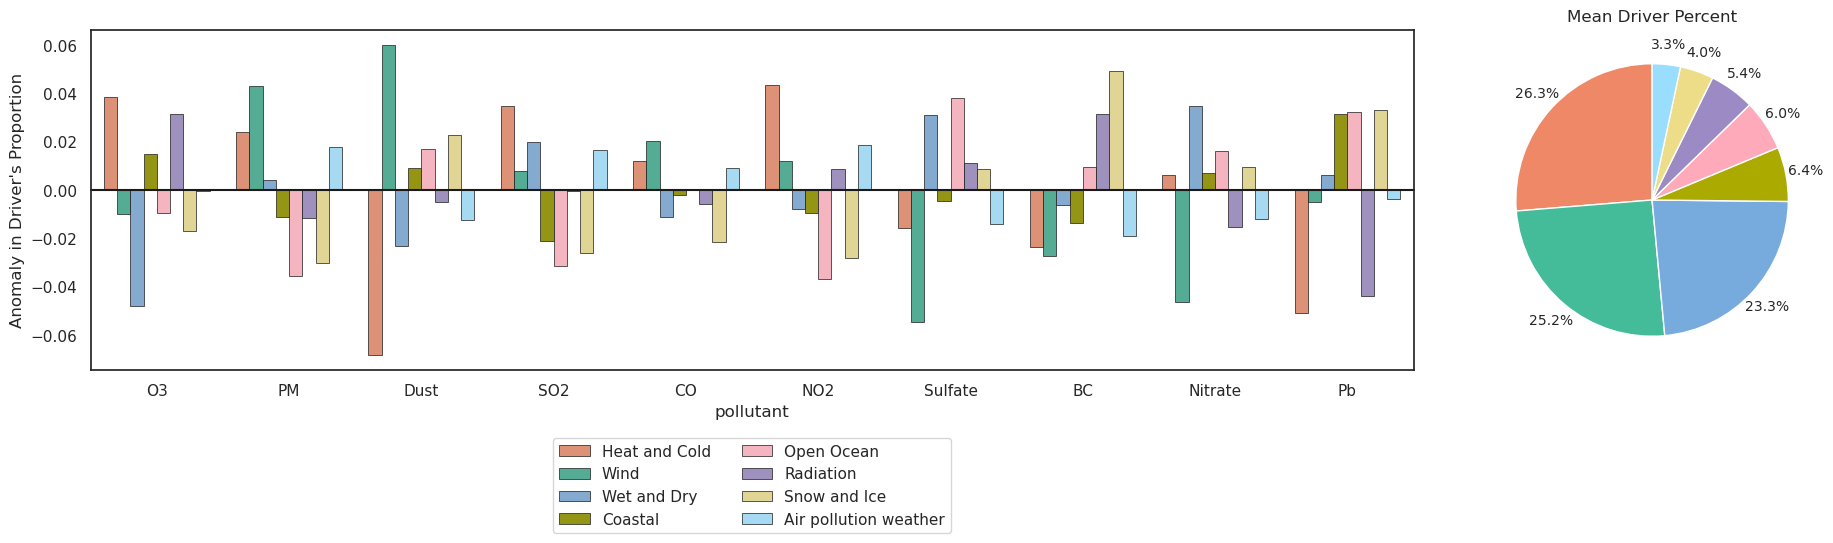

In [28]:
# Bar plot
fig, axs = plt.subplots(1, 2, figsize=(19, 6), tight_layout=True, gridspec_kw={'width_ratios': [3, 1]})

sns.barplot(x="pollutant", y="driver_percent_anomaly", hue="driver", data=plot_data, ax=axs[0], palette=driver_color, edgecolor="k", linewidth=0.5)
axs[0].set_ylabel('Anomaly in Driver\'s Proportion')
axs[0].axhline(0, color="k", clip_on=False)
axs[0].legend(loc='lower center', ncol=2, bbox_to_anchor=(0.5, -0.5))

# Pie plot
mean_driver_percent = plot_data.groupby("driver")["driver_percent_by_pollutant"].mean().sort_values(ascending=False)
axs[1].pie(mean_driver_percent, labels=mean_driver_percent.index, autopct='%1.1f%%', pctdistance=1.15, startangle=90, colors=driver_color, labeldistance=None)
# Adjust pct font size
for text in axs[1].texts:
    text.set_fontsize(10)
axs[1].set_title("Mean Driver Percent")
# plt.savefig("Driver_Proportion.svg")
plt.show()

### Regions and countries

In [25]:
region_count = gen_count("region", data)
country_count = gen_count("country", data)

In [26]:
# Add TWN to CHN
try:
    country_count.loc[country_count["name"] == "CHN", "count"] += country_count.loc[country_count["name"] == "TWN", "count"].values[0]
    country_count = country_count[country_count["name"] != "TWN"]
except:
    pass

# Add HKG to CHN
try:
    country_count.loc[country_count["name"] == "CHN", "count"] += country_count.loc[country_count["name"] == "HKG", "count"].values[0]
    country_count = country_count[country_count["name"] != "HKG"]
except:
    pass

# Add XKX to SRB
try:
    country_count.loc[country_count["name"] == "SRB", "count"] += country_count.loc[country_count["name"] == "XKX", "count"].values[0]
    country_count = country_count[country_count["name"] != "XKX"]
except:
    pass

In [27]:
region_count.to_csv(os.path.join(base_path, "Data", "region_count.csv"), index=False)
country_count.to_csv(os.path.join(base_path, "Data", "country_count.csv"), index=False)

In [28]:
country_count

name  count
1    CHN   3132
0    USA   1845
6    IND    658
16   CAN    389
19   ITA    285
..   ...    ...
165  DMA      1
75   BDI      1
140  SWZ      1
141  ARM      1
202  ASM      1

[200 rows x 2 columns]

In [29]:
region_count

name  count
2           Asia   4917
0  North America   2478
1         Europe   2382
3         Africa    738
5  South America    345
4        Oceania    325

In [30]:
country_list = list(country_count["name"])

/tmp/ipykernel_2903325/1003307193.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="name", data=data, ax=axs, palette=plaette)
/tmp/ipykernel_2903325/1003307193.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(title + ".svg")
/home/lyx/anaconda3/envs/llm-cli-air-review/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


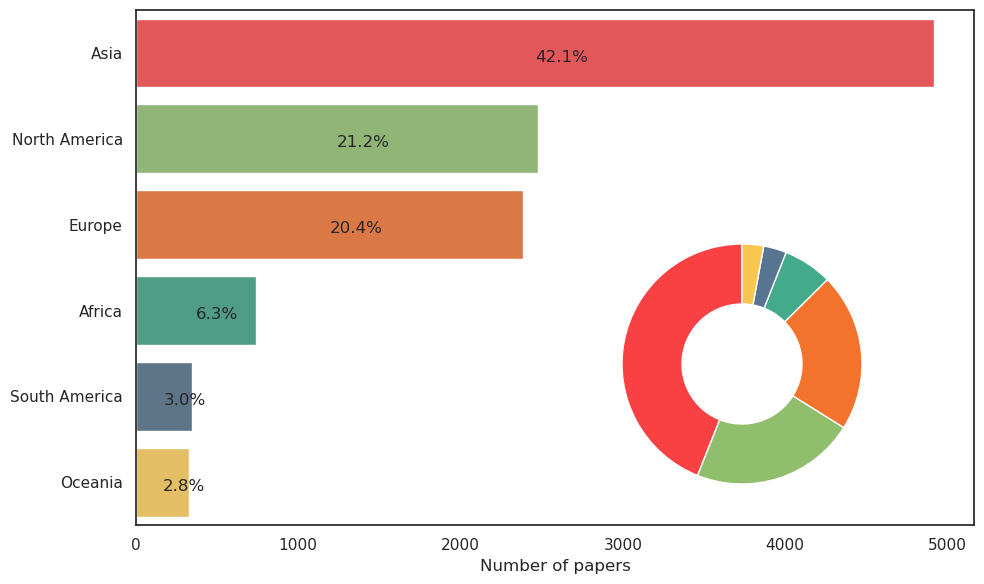

In [35]:
draw_bar_pie(region_count, region_color_dict, "Region Count", sum=all_relevant_sum)

/tmp/ipykernel_2903325/1003307193.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="name", data=data, ax=axs, palette=plaette)
/tmp/ipykernel_2903325/1003307193.py:10: UserWarning: The palette list has more values (18) than needed (10), which may not be intended.
  sns.barplot(x="count", y="name", data=data, ax=axs, palette=plaette)
/tmp/ipykernel_2903325/1003307193.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(title + ".svg")
/home/lyx/anaconda3/envs/llm-cli-air-review/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


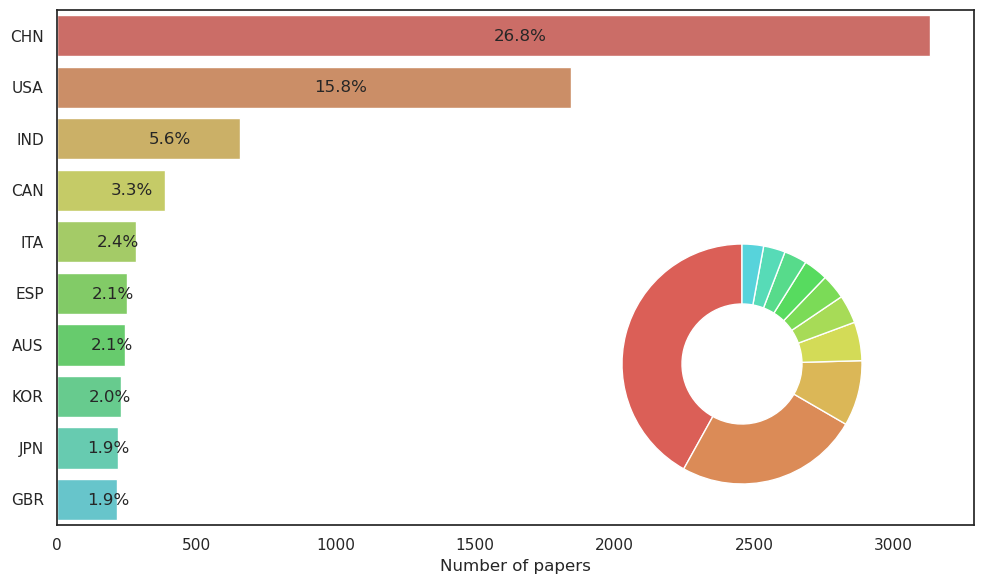

In [36]:
draw_bar_pie(country_count[0:10], plaette, "Country Count", all_relevant_sum)

/tmp/ipykernel_1128933/62892512.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  sns.heatmap(region_pollutant_percent.pivot("name", "region", "percent").fillna(0) , annot=True, linewidths=.5, ax=axs)


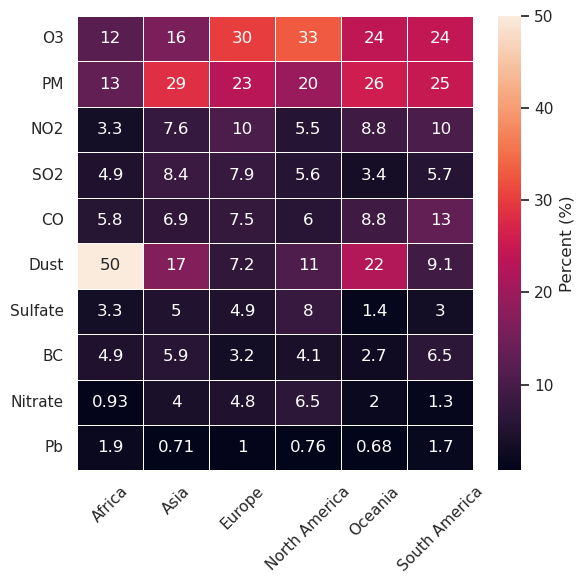

In [31]:
region_pollutant_percent = pd.DataFrame(columns=["region", "name", "percent"])
for region_name in ["Africa", "Asia", "Europe", "North America", "South America", "Oceania"]:
    pollutant_count_by_region = gen_count("pollutants", data[data["region"]==region_name])
    pollutant_count_by_region["percent"] = pollutant_count_by_region["count"] / pollutant_count_by_region["count"].sum()
    pollutant_count_by_region["region"] = region_name
    region_pollutant_percent = pd.concat([region_pollutant_percent, pollutant_count_by_region])

# Draw heatmap using sns, x is region, y is pollutant, value is percent
fig, axs = plt.subplots(1, 1, figsize=(6, 6), tight_layout=True)
# Sort name by PM O3 NO2 SO2 CO Dust Sulfate BC Nitrate Pb
region_pollutant_percent["name"] = pd.Categorical(region_pollutant_percent["name"], categories=["O3", "PM", "NO2", "SO2", "CO", "Dust", "Sulfate", "BC", "Nitrate", "Pb"], ordered=True)
region_pollutant_percent["percent"] = region_pollutant_percent["percent"] * 100
sns.heatmap(region_pollutant_percent.pivot("name", "region", "percent").fillna(0) , annot=True, linewidths=.5, ax=axs)
# Color bar label
cbar = axs.collections[0].colorbar
cbar.set_label('Percent (%)')
axs.set_xlabel('')
axs.set_ylabel('')

plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.savefig("region_pollutant_percent.svg")
plt.show()

/tmp/ipykernel_2903325/1003307193.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="name", data=data, ax=axs, palette=plaette)
/tmp/ipykernel_2903325/1003307193.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(title + ".svg")
/home/lyx/anaconda3/envs/llm-cli-air-review/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


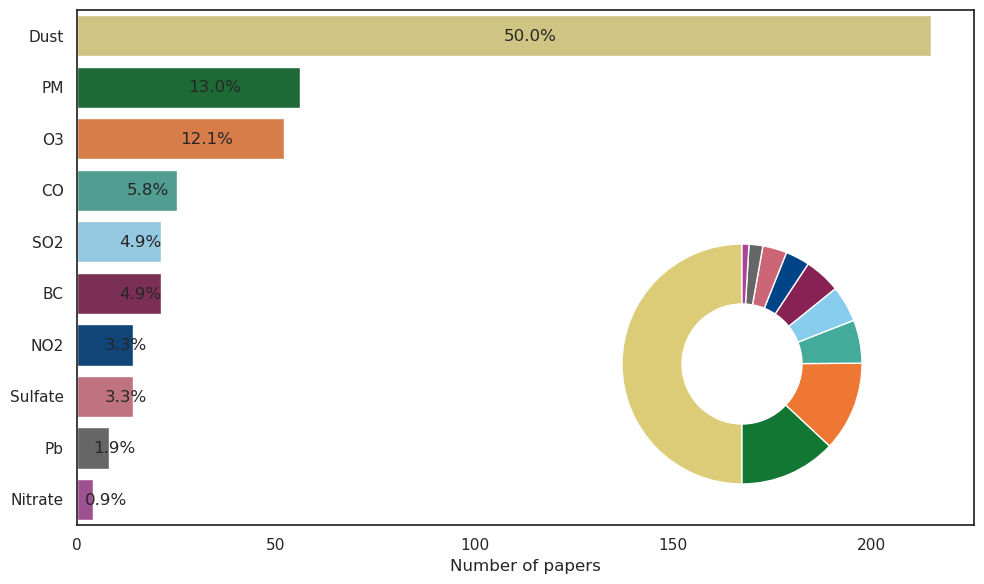

/tmp/ipykernel_2903325/1003307193.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="name", data=data, ax=axs, palette=plaette)
/tmp/ipykernel_2903325/1003307193.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(title + ".svg")
/home/lyx/anaconda3/envs/llm-cli-air-review/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


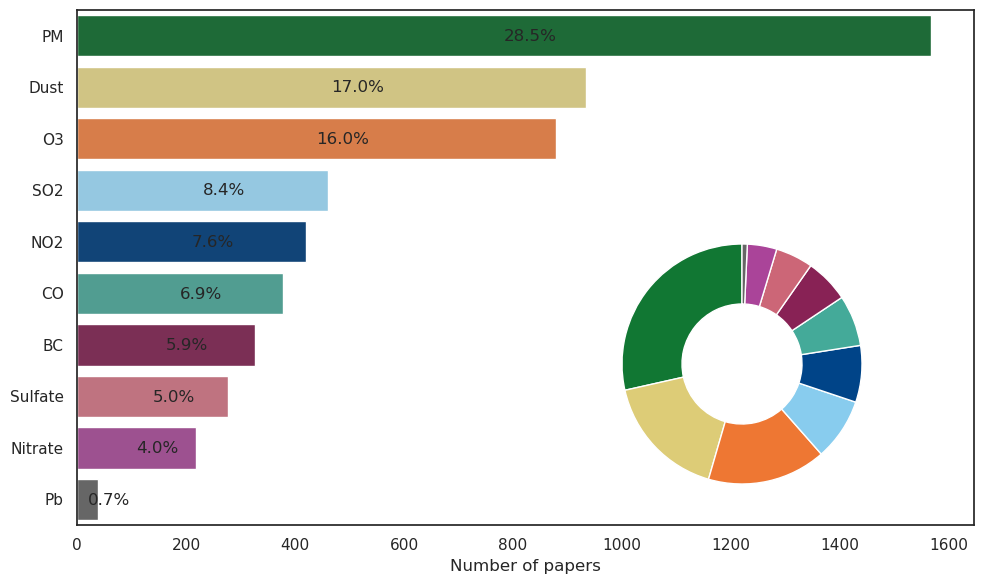

/tmp/ipykernel_2903325/1003307193.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="name", data=data, ax=axs, palette=plaette)
/tmp/ipykernel_2903325/1003307193.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(title + ".svg")
/home/lyx/anaconda3/envs/llm-cli-air-review/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


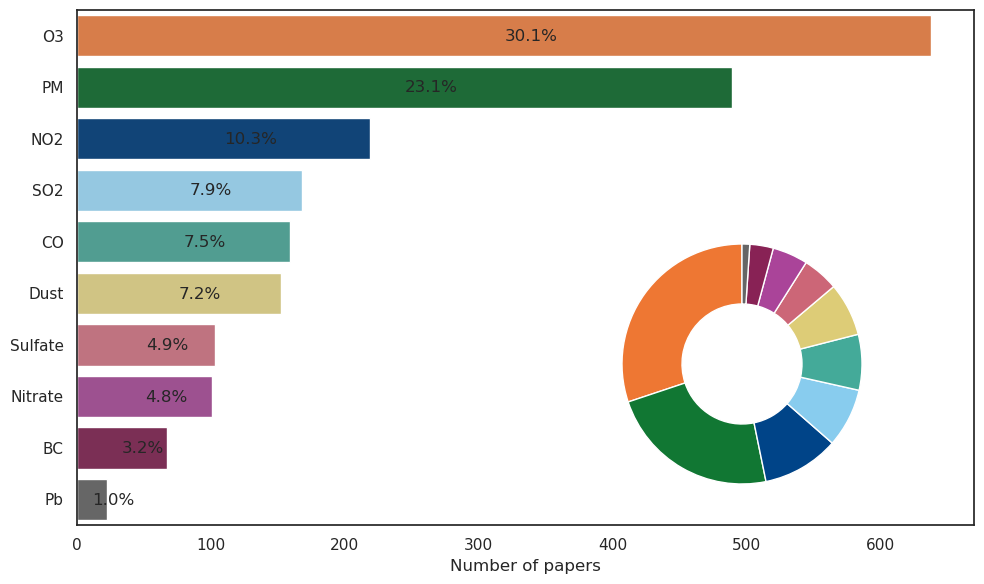

/tmp/ipykernel_2903325/1003307193.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="name", data=data, ax=axs, palette=plaette)
/tmp/ipykernel_2903325/1003307193.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(title + ".svg")
/home/lyx/anaconda3/envs/llm-cli-air-review/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


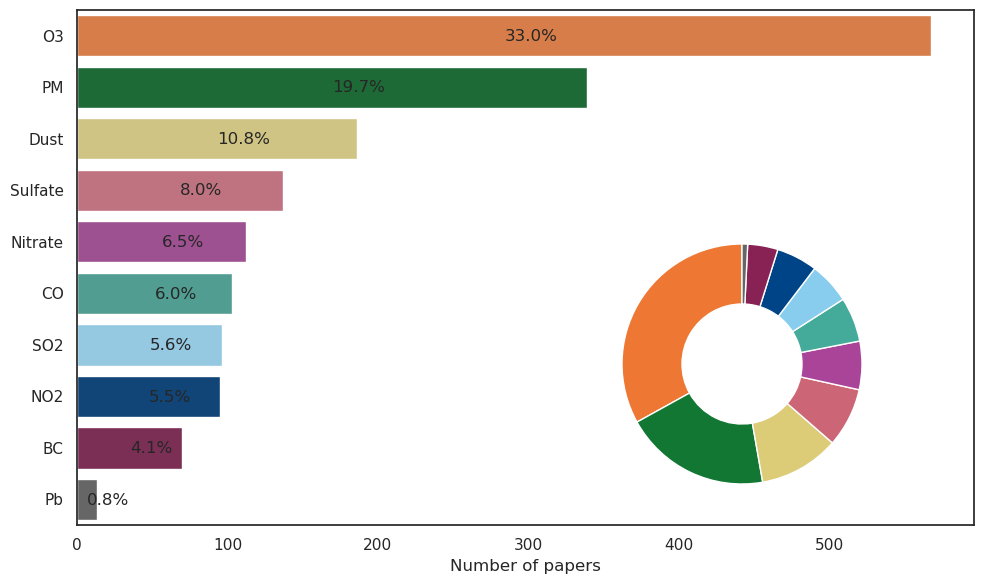

/tmp/ipykernel_2903325/1003307193.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="name", data=data, ax=axs, palette=plaette)
/tmp/ipykernel_2903325/1003307193.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(title + ".svg")
/home/lyx/anaconda3/envs/llm-cli-air-review/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


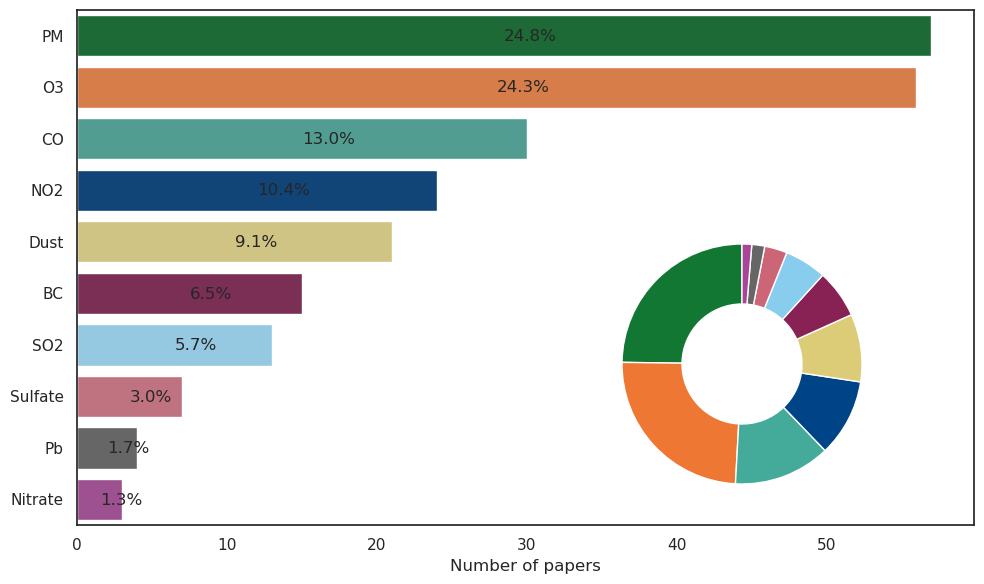

/tmp/ipykernel_2903325/1003307193.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="count", y="name", data=data, ax=axs, palette=plaette)
/tmp/ipykernel_2903325/1003307193.py:26: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.savefig(title + ".svg")
/home/lyx/anaconda3/envs/llm-cli-air-review/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


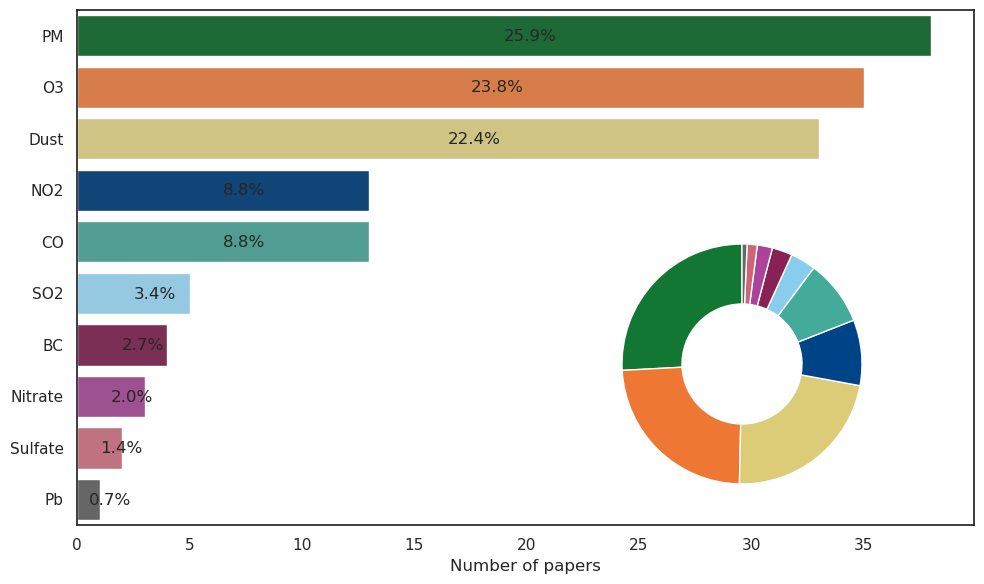

In [38]:
for region_name in ["Africa", "Asia", "Europe", "North America", "South America", "Oceania"]:
    pollutant_count_by_region = gen_count("pollutants", data[data["region"]==region_name])
    draw_bar_pie(pollutant_count_by_region, pollutant_color_dic, f"Pollutant Count in {region_name}")

### Sankey plot

In [32]:
import plotly
import plotly.graph_objects as go

In [ ]:
# NOTICE: Only use document that contains drivers, pollutants, region at the same time to draw the Sankey diagram
link = pd.DataFrame(columns=["source", "target", "value"])
link["value"] = link["value"].astype(float)

for source in driver_list:
    for target in pollutant_list:
        link = pd.concat([link, pd.DataFrame([[source, target, 0]], columns=["source", "target", "value"])])

for source in pollutant_list:
    for target in region_list:
        link = pd.concat([link, pd.DataFrame([[source, target, 0]], columns=["source", "target", "value"])])

cnt_row = 0

for index, row in data.iterrows():
    if not row["drivers"] or row["drivers"].lower() == "not found" or row["drivers"].lower() == "not mentioned":
        continue
    if not row["pollutants"] or row["pollutants"].lower() == "not found" or row["pollutants"].lower() == "not mentioned":
        continue
    if not row["region"] or row["region"].lower() == "not found" or row["region"].lower() == "not mentioned":
        continue
    cnt_row += 1
    driver_cnt = len(row["drivers"].split(";"))
    pollutant_cnt = len(row["pollutants"].split(";"))
    region_cnt = len(row["region"].split(";"))
    weight = 1 / (driver_cnt * pollutant_cnt * region_cnt)
    for driver in row["drivers"].split(";"):
        for pollutant in row["pollutants"].split(";"):
            for region in row["region"].split(";"):
                # NOTICE: Do not count "Antarctica"
                # if region == "Antarctica":
                #     continue
                link.loc[(link["source"] == driver) & (link["target"] == pollutant), "value"] += weight
                link.loc[(link["source"] == pollutant) & (link["target"] == region), "value"] += weight

print(cnt_row)
print(link)

In [40]:
# 版本1改：一篇文章的权重分子为污染物数目
link = pd.DataFrame(columns=["source", "target", "value"])
link["value"] = link["value"].astype(float)

for source in driver_list:
    for target in pollutant_list:
        link = pd.concat([link, pd.DataFrame([[source, target, 0]], columns=["source", "target", "value"])])

for source in pollutant_list:
    for target in region_list:
        link = pd.concat([link, pd.DataFrame([[source, target, 0]], columns=["source", "target", "value"])])

cnt_row = 0

for index, row in data.iterrows():
    if not row["drivers"] or row["drivers"].lower() == "not found" or row["drivers"].lower() == "not mentioned":
        continue
    if not row["pollutants"] or row["pollutants"].lower() == "not found" or row["pollutants"].lower() == "not mentioned":
        continue
    if not row["region"] or row["region"].lower() == "not found" or row["region"].lower() == "not mentioned":
        continue
    cnt_row += 1
    driver_cnt = len(row["drivers"].split(";"))
    pollutant_cnt = len(row["pollutants"].split(";"))
    region_cnt = len(row["region"].split(";"))
    weight = pollutant_cnt / (driver_cnt * pollutant_cnt * region_cnt)
    for driver in row["drivers"].split(";"):
        for pollutant in row["pollutants"].split(";"):
            for region in row["region"].split(";"):
                # NOTICE: Do not count "Antarctica"
                # if region == "Antarctica":
                #     continue
                link.loc[(link["source"] == driver) & (link["target"] == pollutant), "value"] += weight
                link.loc[(link["source"] == pollutant) & (link["target"] == region), "value"] += weight

print(cnt_row)
print(link)

6965
           source         target       value
0   Heat and Cold             O3  746.809524
0   Heat and Cold             PM  792.966667
0   Heat and Cold           Dust  351.650000
0   Heat and Cold            SO2  259.400000
0   Heat and Cold             CO  225.676190
..            ...            ...         ...
0              Pb  South America    6.333333
0              Pb         Africa   13.250000
0              Pb  North America   22.250000
0              Pb         Europe   29.666667
0              Pb           Asia   44.250000

[140 rows x 3 columns]


In [52]:
# 版本2：尽量考虑所有文章
link = pd.DataFrame(columns=["source", "target", "value"])
link["value"] = link["value"].astype(float)

for source in driver_list:
    for target in pollutant_list:
        link = pd.concat([link, pd.DataFrame([[source, target, 0]], columns=["source", "target", "value"])])

for source in pollutant_list:
    for target in region_list:
        link = pd.concat([link, pd.DataFrame([[source, target, 0]], columns=["source", "target", "value"])])

cnt_row = 0

for index, row in data.iterrows():
    if row["drivers"] and row["drivers"].lower() != "not found" and row["drivers"].lower() != "not mentioned":
        driver_cnt = len(row["drivers"].split(";"))
    else:
        driver_cnt = 0
    if row["pollutants"] and row["pollutants"].lower() != "not found" and row["pollutants"].lower() != "not mentioned":
        pollutant_cnt = len(row["pollutants"].split(";"))
    else:
        pollutant_cnt = 0
    if row["region"] and row["region"].lower() != "not found" and row["region"].lower() != "not mentioned":
        region_cnt = len(row["region"].split(";"))
    else:
        region_cnt = 0
    if pollutant_cnt == 0:
        continue
    cnt_row += 1
    if driver_cnt == 0 and region_cnt == 0:
        weight = 1 / (len(driver_list) * pollutant_cnt * len(region_list))
        for driver in driver_list:
            for pollutant in row["pollutants"].split(";"):
                for region in region_list:
                    link.loc[(link["source"] == driver) & (link["target"] == pollutant), "value"] += weight
                    link.loc[(link["source"] == pollutant) & (link["target"] == region), "value"] += weight
        continue
    if driver_cnt > 0 and region_cnt > 0:
        weight = 1 / (driver_cnt * pollutant_cnt + pollutant_cnt * region_cnt)
        for driver in row["drivers"].split(";"):
            for pollutant in row["pollutants"].split(";"):
                for region in row["region"].split(";"):
                    link.loc[(link["source"] == driver) & (link["target"] == pollutant), "value"] += weight
                    link.loc[(link["source"] == pollutant) & (link["target"] == region), "value"] += weight
        continue
    if driver_cnt > 0 and region_cnt == 0:
        weight = 1 / (driver_cnt * pollutant_cnt * len(region_list))
        for driver in row["drivers"].split(";"):
            for pollutant in row["pollutants"].split(";"):
                for region in region_list:
                    link.loc[(link["source"] == driver) & (link["target"] == pollutant), "value"] += weight
                    link.loc[(link["source"] == pollutant) & (link["target"] == region), "value"] += weight
        continue
    if driver_cnt == 0 and region_cnt > 0:
        weight = 1 / (len(driver_list) * pollutant_cnt * region_cnt)
        for driver in driver_list:
            for pollutant in row["pollutants"].split(";"):
                for region in row["region"].split(";"):
                    link.loc[(link["source"] == driver) & (link["target"] == pollutant), "value"] += weight
                    link.loc[(link["source"] == pollutant) & (link["target"] == region), "value"] += weight
        continue

print(cnt_row)
print(link)

9266
           source         target       value
0   Heat and Cold             O3  578.878274
0   Heat and Cold             PM  453.533472
0   Heat and Cold           Dust  299.915430
0   Heat and Cold            SO2  106.348413
0   Heat and Cold             CO  112.726515
..            ...            ...         ...
0              Pb  South America    5.747222
0              Pb         Africa    6.922778
0              Pb  North America   12.360714
0              Pb         Europe   17.733889
0              Pb           Asia   22.347500

[140 rows x 3 columns]


In [38]:
# 版本2改：尽量考虑所有文章，且分子为污染物数目
link = pd.DataFrame(columns=["source", "target", "value"])
link["value"] = link["value"].astype(float)

for source in driver_list:
    for target in pollutant_list:
        link = pd.concat([link, pd.DataFrame([[source, target, 0]], columns=["source", "target", "value"])])

for source in pollutant_list:
    for target in region_list:
        link = pd.concat([link, pd.DataFrame([[source, target, 0]], columns=["source", "target", "value"])])

cnt_row = 0

for index, row in data.iterrows():
    if row["drivers"] and row["drivers"].lower() != "not found" and row["drivers"].lower() != "not mentioned":
        driver_cnt = len(row["drivers"].split(";"))
    else:
        driver_cnt = 0
    if row["pollutants"] and row["pollutants"].lower() != "not found" and row["pollutants"].lower() != "not mentioned":
        pollutant_cnt = len(row["pollutants"].split(";"))
    else:
        pollutant_cnt = 0
    if row["region"] and row["region"].lower() != "not found" and row["region"].lower() != "not mentioned":
        region_cnt = len(row["region"].split(";"))
    else:
        region_cnt = 0
    if pollutant_cnt == 0:
        continue
    cnt_row += 1
    weight_base = pollutant_cnt
    if driver_cnt == 0 and region_cnt == 0:
        weight = weight_base / (len(driver_list) * pollutant_cnt * len(region_list))
        for driver in driver_list:
            for pollutant in row["pollutants"].split(";"):
                for region in region_list:
                    link.loc[(link["source"] == driver) & (link["target"] == pollutant), "value"] += weight
                    link.loc[(link["source"] == pollutant) & (link["target"] == region), "value"] += weight
        continue
    if driver_cnt > 0 and region_cnt > 0:
        weight = weight_base / (driver_cnt * pollutant_cnt + pollutant_cnt * region_cnt)
        for driver in row["drivers"].split(";"):
            for pollutant in row["pollutants"].split(";"):
                for region in row["region"].split(";"):
                    link.loc[(link["source"] == driver) & (link["target"] == pollutant), "value"] += weight
                    link.loc[(link["source"] == pollutant) & (link["target"] == region), "value"] += weight
        continue
    if driver_cnt > 0 and region_cnt == 0:
        weight = weight_base / (driver_cnt * pollutant_cnt * len(region_list))
        for driver in row["drivers"].split(";"):
            for pollutant in row["pollutants"].split(";"):
                for region in region_list:
                    link.loc[(link["source"] == driver) & (link["target"] == pollutant), "value"] += weight
                    link.loc[(link["source"] == pollutant) & (link["target"] == region), "value"] += weight
        continue
    if driver_cnt == 0 and region_cnt > 0:
        weight = weight_base / (len(driver_list) * pollutant_cnt * region_cnt)
        for driver in driver_list:
            for pollutant in row["pollutants"].split(";"):
                for region in row["region"].split(";"):
                    link.loc[(link["source"] == driver) & (link["target"] == pollutant), "value"] += weight
                    link.loc[(link["source"] == pollutant) & (link["target"] == region), "value"] += weight
        continue

print(cnt_row)
print(link)

9266
           source         target       value
0   Heat and Cold             O3  810.707143
0   Heat and Cold             PM  704.042857
0   Heat and Cold           Dust  366.734921
0   Heat and Cold            SO2  238.466667
0   Heat and Cold             CO  223.354762
..            ...            ...         ...
0              Pb  South America    8.066667
0              Pb         Africa   13.997222
0              Pb  North America   23.447222
0              Pb         Europe   24.600000
0              Pb           Asia   36.563889

[140 rows x 3 columns]


In [39]:
sankey_labels = driver_list + pollutant_list + region_list

driver_color_new = [driver_color_dic[item] for item in driver_list]
pollutant_color_new = [pollutant_color_dic[item] for item in pollutant_list]
region_color_new = [region_color_dict[item] for item in region_list]

color_list = driver_color_new + pollutant_color_new + region_color_new
# Convert to palette
color_list = sns.color_palette(color_list)
color_list_rgba = [f"rgba({int(item[0]*255)},{int(item[1]*255)},{int(item[2]*255)},1.0)" for item in color_list]

# Change value to sankey_labels.index(value)
link["source"] = link["source"].apply(lambda x: sankey_labels.index(x))
link["target"] = link["target"].apply(lambda x: sankey_labels.index(x))

link["color"] = link["source"].apply(lambda x: color_list_rgba[x].replace("1.0", "0.5"))

# 将link转换为 dict(source=[], target=[], value=[])
link = link.to_dict(orient="list")

In [40]:
# Draw the Sankey diagram
fig = go.Figure(data=[go.Sankey(
    # arrangement = "snap",
    valueformat = "f",
    valuesuffix = " links",
    node = dict(
        pad = 15,
        thickness = 20,
        line = dict(color = "black", width = 1),
        label = sankey_labels,
        color = color_list_rgba,
    ),
    link = link,
)])

fig.update_layout(
    height = 1200,
    font_size = 26,
    font_family = "sans-serif",
    # paper_bgcolor = "rgba(255,255,255,0)",
)

# fig.update_layout(title_text="Basic Sankey Diagram", font_size=10)
fig.show()

fig.write_image("sankey.svg", width=1000, height=1200)
fig.write_image("sankey.png", width=1000, height=1200)

### Word Cloud of country

In [48]:
from pycountry_convert import country_alpha3_to_country_alpha2, country_alpha2_to_continent_code, convert_continent_code_to_continent_name
import pycountry
def get_continent_name(country_alpha3):
    if country_alpha3 in ["XKX"]:
        return "Europe"

    country_alpha2 = country_alpha3_to_country_alpha2(country_alpha3)
    if country_alpha2 in ["TL"]:
        return "Asia"
    if country_alpha2 in ["AQ","TF"]:
        return "Antarctica"
    if country_alpha2 in ["EH"]:
        return "Africa"
    if country_alpha2 in ["UM", "SX"]:
        return "North America"
    continent_code = country_alpha2_to_continent_code(country_alpha2)
    continent_name = convert_continent_code_to_continent_name(continent_code)
    return continent_name

In [49]:
country_count["region"] = country_count["name"].apply(lambda x: get_continent_name(x))
country_count["full_name"] = country_count["name"].apply(lambda x: pycountry.countries.get(alpha_3=x).name)

In [50]:
# If full_name like "XX, Republic of", then change it to "Republic of XX"
country_count["full_name"] = country_count["full_name"].apply(lambda x: x.split(",")[1].strip() + " " + x.split(",")[0].strip() if "," in x else x)

In [51]:
print(list(country_count["full_name"]))

['China', 'United States', 'India', 'Canada', 'Italy', 'Spain', 'Australia', 'Republic of Korea', 'Japan', 'United Kingdom', 'Russian Federation', 'Islamic Republic of Iran', 'Germany', 'Mexico', 'Western Sahara', 'Greece', 'Mongolia', 'Brazil', 'France', 'Greenland', 'Indonesia', 'Poland', 'Türkiye', 'Pakistan', 'Malaysia', 'Portugal', 'Norway', 'Antarctica', 'Sweden', 'Saudi Arabia', 'Thailand', 'Switzerland', 'Finland', 'Iraq', 'Cuba', 'South Africa', 'Nepal', 'The Democratic Republic of the Congo', 'Chile', 'Philippines', 'New Zealand', 'Egypt', 'Israel', 'Netherlands', 'Romania', 'Argentina', 'Hungary', 'Bangladesh', 'Kuwait', 'Nigeria', 'Algeria', 'Czechia', 'Viet Nam', 'Guinea', 'Austria', 'Jordan', 'Niger', 'Tunisia', 'Afghanistan', 'Colombia', 'Iceland', 'Bulgaria', 'Kazakhstan', 'Syrian Arab Republic', 'Singapore', 'Lithuania', 'Svalbard and Jan Mayen', 'United Arab Emirates', 'Bermuda', 'Guam', 'Morocco', 'Ireland', 'Cambodia', 'Croatia', 'Georgia', 'Denmark', 'Barbados', 'U

In [52]:
from wordcloud import WordCloud, STOPWORDS

class MyColorFunctor():
  def __init__(self,frequencies):
    self.frequencies = frequencies

  def __call__(self,word,font_size,position,orientation,random_state=None,**kwargs):
    # color_int = 255 - min(int(255 * self.frequencies[word] / 300 *120/100), 255) # 120/100是为了让颜色更深一些，用于画Country图
    color_int = min(230, 255 - min(int(255 * self.frequencies[word] / 300), 255)) # 一般算法，用于画Driver图
    return "rgb(%d, %d, %d)" % (color_int, color_int, color_int)

def draw_word_cloud(data, width=300, height=200, field="full_name", threshold=100, scale=4, max_font_size=None, file_name=None):
    # data is a pd.DataFrame with column "name" and "count"
    # Draw the word cloud, the size of the word is proportional to the count
    wordcloud = WordCloud(width=width, height=height, scale=scale, background_color="rgba(255, 255, 255, 0)", mode="RGBA", max_words=1000, max_font_size=max_font_size,
                          font_path="./CALIBRI.TTF", collocation_threshold=threshold, prefer_horizontal=1,
                          color_func=MyColorFunctor(data.set_index(field)["count"].to_dict()))
    wordcloud.generate_from_frequencies(frequencies=data.set_index(field)["count"].to_dict())
    plt.figure(figsize=(20,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    if file_name:
        # plt.savefig("wordcloud_" + file_name + ".svg")
        # Write to svg using wordcloud.to_svg()
        with open("wordcloud_" + file_name + ".svg", "w") as f:
            f.write(wordcloud.to_svg())
    plt.show()

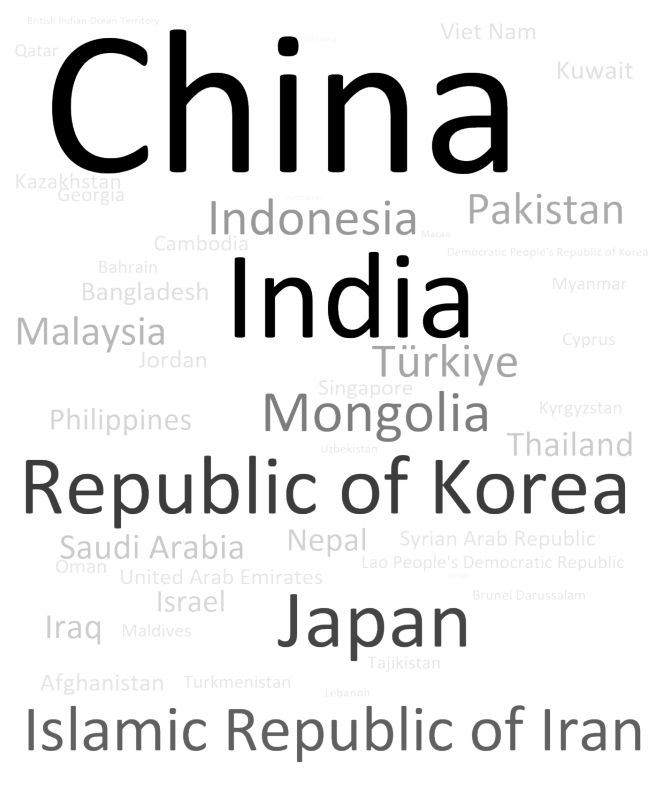

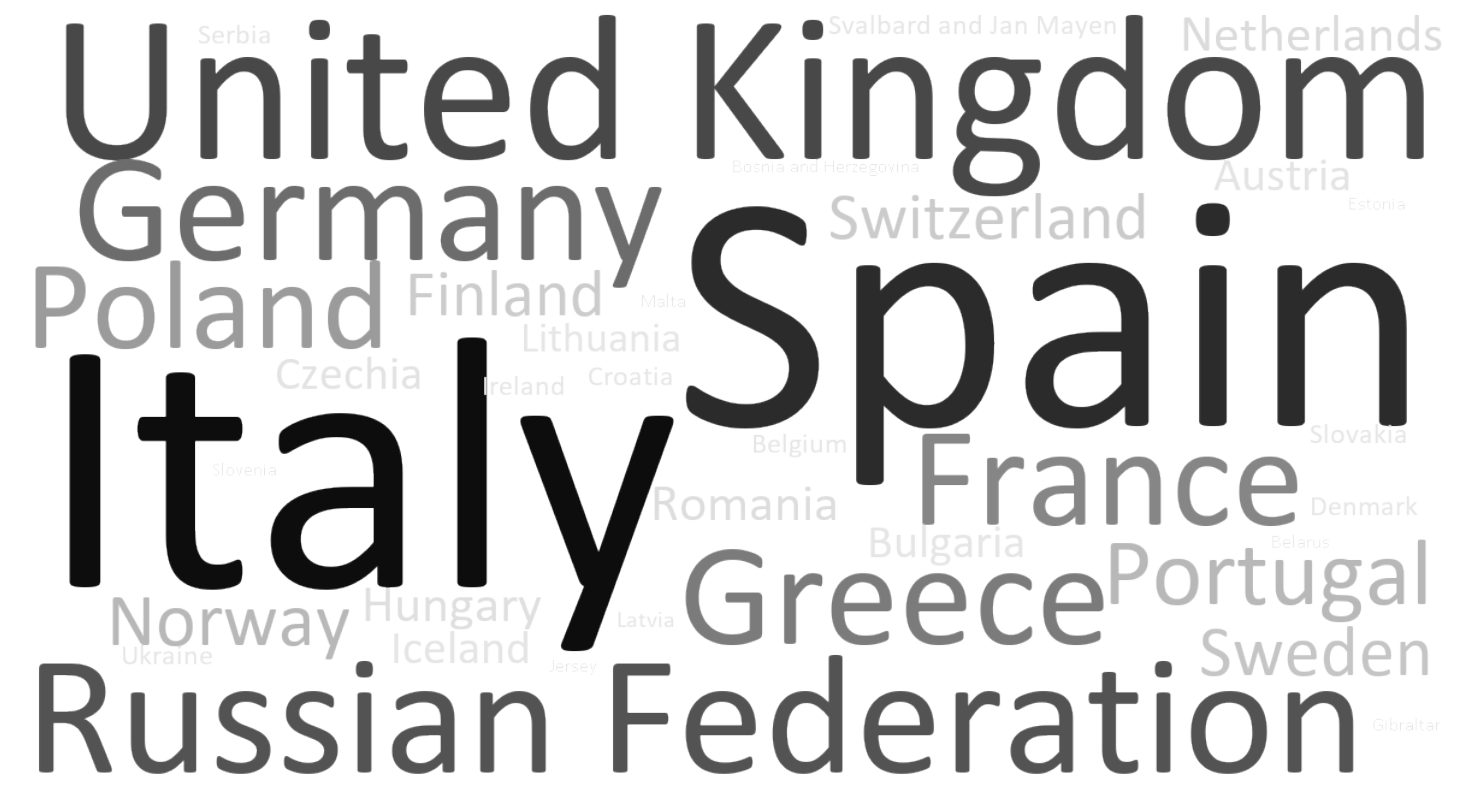

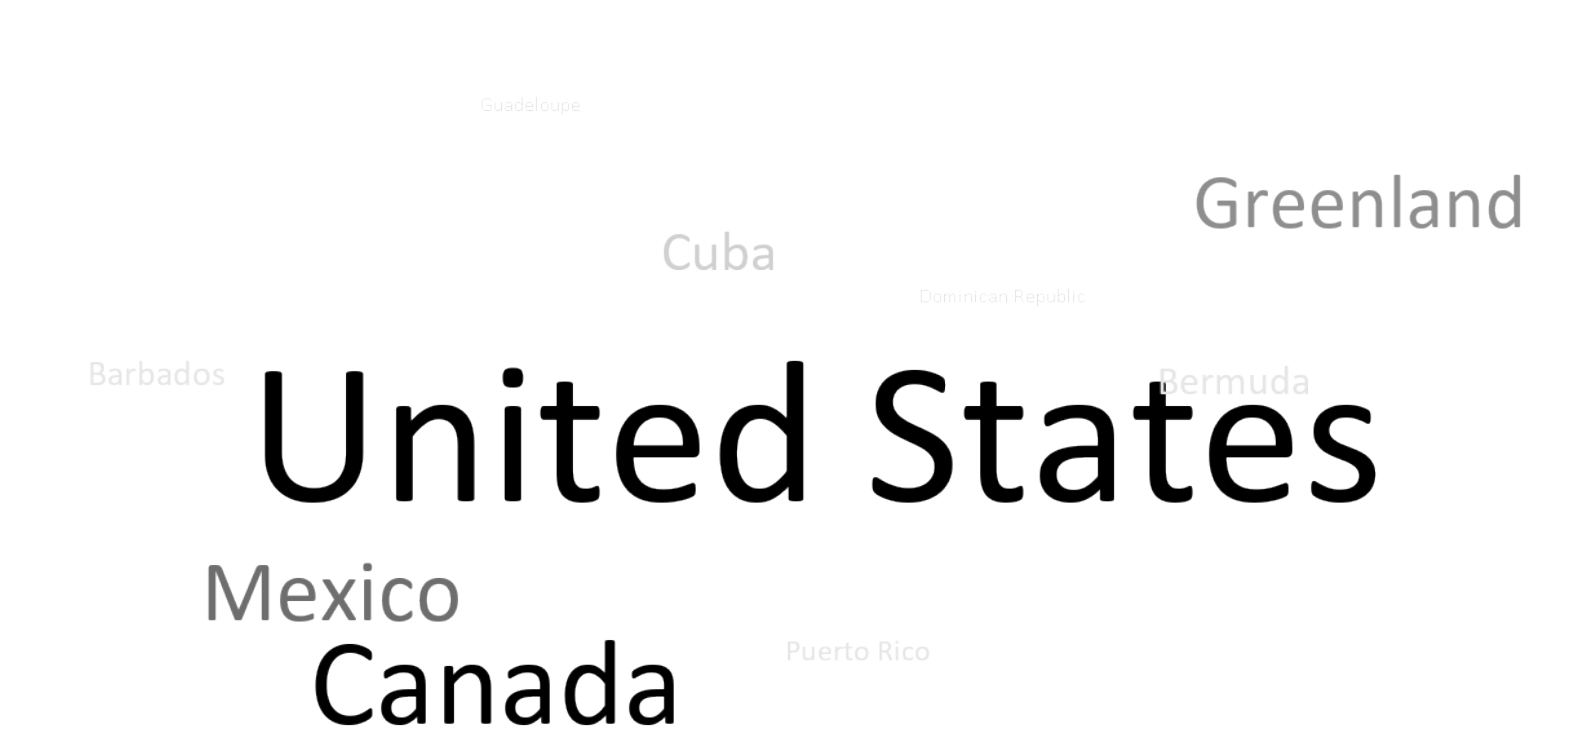

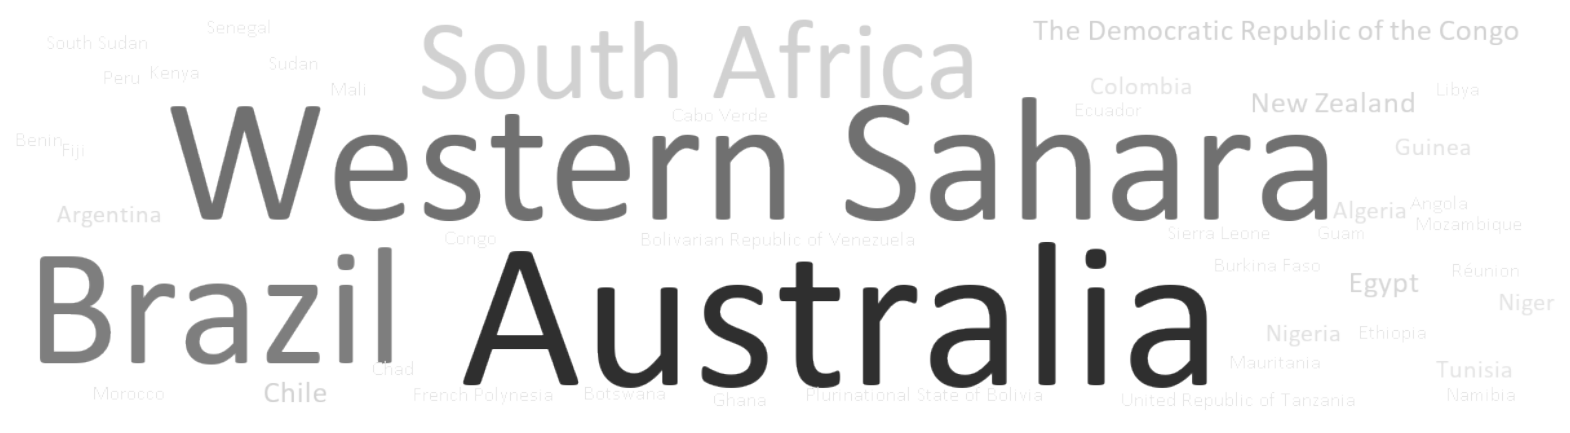

In [53]:
draw_word_cloud(country_count[country_count["region"] == "Asia"], height=360, file_name="Region_Asia")
draw_word_cloud(country_count[country_count["region"] == "Europe"], height=160, file_name="Region_Europe")
draw_word_cloud(country_count[country_count["region"] == "North America"], height=140, file_name="Region_North_America")
draw_word_cloud(country_count[country_count["region"].isin(["South America", "Africa", "Oceania"])], height=80, file_name="Region_Other")

### Word Cloud of Climate factors

Preparation for the word cloud.

（这部分需要换一下conda内核跑，绘图可跳过）

In [54]:
import spacy
import re
nlp = spacy.load("en_core_web_lg")

def lemma_content(text):
    # delete all "-" in the text
    text = re.sub(r"\-", "", text)
    text = nlp(text.lower())
    text = [token.lemma_ for token in text if not token.is_punct]
    text = " ".join(text)
    return text

/home/lyx/anaconda3/envs/llm-cli-air-review/lib/python3.10/site-packages/transformers/utils/generic.py:441: UserWarning:

torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.

/home/lyx/anaconda3/envs/llm-cli-air-review/lib/python3.10/site-packages/transformers/utils/generic.py:309: UserWarning:

torch.utils._pytree._register_pytree_node is deprecated. Please use torch.utils._pytree.register_pytree_node instead.



In [55]:
all_title_lemma = relevant_documents["title"].to_list()
all_title_lemma = [lemma_content(_) for _ in all_title_lemma]

# Save the lemma of title to a file
with open(os.path.join(base_path, "Data", "all_title_lemma.txt"), "w") as f:
    f.write("\n".join(all_title_lemma))

In [56]:
all_abstract_lemma = relevant_documents["abstract"].to_list()
all_abstract_lemma = [lemma_content(_) for _ in all_abstract_lemma]

# Save the lemma of abstract to a file
with open(os.path.join(base_path, "Data", "all_abstract_lemma.txt"), "w") as f:
    f.write("\n".join(all_abstract_lemma))

In [57]:
# Save the lemma of abstract to a file
with open(os.path.join(base_path, "Data", "all_abstract_lemma.txt"), "w") as f:
    f.write("\n\n".join(all_abstract_lemma))

In [58]:
climate_factors_phrase = pd.read_csv(os.path.join(base_path, "Data", "climate_factors_phrase.csv"))
climate_factors_phrase["phrase"] = climate_factors_phrase["phrase"].apply(lambda x: lemma_content(x.lower()))
climate_factors_phrase.to_csv(os.path.join(base_path, "Data", "climate_factors_phrase_lemma.csv"), index=False)

Draw the word cloud.

In [59]:
climate_factors_phrase = pd.read_csv(os.path.join(base_path, "Data", "climate_factors_phrase_lemma.csv"))
climate_factors_phrase_list = climate_factors_phrase["phrase"].tolist()
climate_factors_phrase_list = [" "+_+" " for _ in climate_factors_phrase_list]

In [60]:
# Read the title lemma from file
with open(os.path.join(base_path, "Data", "all_title_lemma.txt"), "r") as f:
    all_title_lemma = f.read().split("\n")
all_title_combined = " " + " ".join(all_title_lemma) + " "

# Read the abstract lemma from file
with open(os.path.join(base_path, "Data", "all_abstract_lemma.txt"), "r") as f:
    all_abstract_lemma = f.read().split("\n")
all_abstract_combined = " " + " ".join(all_abstract_lemma) + " "

all_text = all_title_combined + all_abstract_combined

In [61]:
# Count the frequency of each climate factor
climate_factors_count = pd.DataFrame(columns=["phrase", "count"])

for phrase in climate_factors_phrase_list:
    climate_factors_count = pd.concat([climate_factors_count, pd.DataFrame({"phrase": [phrase], "count": [all_text.count(phrase)]})])

In [62]:
climate_factors_count["phrase"] = climate_factors_count["phrase"].apply(lambda x: x.strip())
climate_factors_count = climate_factors_count[climate_factors_count["count"] > 0].reset_index(drop=True)
print(climate_factors_count["phrase"].to_list())

['heat and cold', 'heat', 'cold', 'temperature', 'warm', 'warm', 'heatwave', 'freeze', 'freeze', 'frost', 'frost', 'hoarfrost', 'rime', 'thermal', 'frigid', 'scorch', 'subzero', 'wet and dry', 'rain', 'raindrop', 'flood', 'wet', 'dry', 'moisture', 'moist', 'rainfall', 'precipitation', 'humidity', 'humid', 'landslide', 'aridity', 'hydrological', 'drought', 'fire weather', 'wildfire', 'damp', 'waterlogge', 'drizzle', 'steam', 'steam', 'desiccation', 'hygroscopicity', 'evaporation', 'porosity', 'wind', 'cyclone', 'hurricane', 'typhoon', 'sand storm', 'dust storm', 'breeze', 'gust', 'tornado', 'squall', 'gale', 'zephyr', 'chinook', 'mistral', 'monsoon', 'sirocco', 'squall', 'jet stream', 'flow', 'turbulence', 'snow and ice', 'snow', 'ice', 'glacier', 'permafrost', 'snowfall', 'hail', 'avalanche', 'iceberg', 'slush', 'cryosphere', 'freeze', 'freeze', 'freeze', 'firn', 'graupel', 'coastal', 'sea level', 'shoreline', 'offshore', 'seashore', 'seaboard', 'beach', 'coastline', 'nearshore', 'stor

In [63]:
climate_factors_count

phrase  count
0           heat and cold     10
1                    heat   1761
2                    cold   1837
3             temperature  10637
4                    warm   1757
..                    ...    ...
116        air stagnation     79
117     weather condition    615
118  atmospheric pressure    166
119          air pressure    141
120             radiation   2229

[121 rows x 2 columns]

In [64]:
# Merge similar phrases
similar_phrase = {
    'drizzle': ['drizzly', 'drizzle'],
    'marine': ['marine', 'marina'],
    'seashore': ['seashore', 'nearshore'],
    'ocean': ['ocean', 'oceanic'],
    'frost': ['frost', 'frosty', 'hoarfrost'],
    'rime': ['rime', 'rimy'],
    'precipitation': ['precipitation', 'rain', 'raindrop', 'rainfall'],
    'moist': ['moist', 'moisture'],
    'humid': ['humid', 'humidity'],
    'hurricane': ['hurricane', 'typhoon'],
    'snow': ['snow', 'snowfall'],
    'dust storm': ['dust storm', 'sand storm'],
    'air pressure': ['air pressure', 'atmospheric pressure'],
}
delete_phrase = ['heat and cold', 'wet and dry', 'snow and ice', 'open ocean']
for phrase in delete_phrase:
    climate_factors_count = climate_factors_count[climate_factors_count["phrase"] != phrase]
climate_factors_count = climate_factors_count.reset_index(drop=True)

# Merge similar phrases in climate_factors_count
for key, value in similar_phrase.items():
    climate_factors_count.loc[climate_factors_count["phrase"].isin(value), "phrase"] = key
climate_factors_count = climate_factors_count.groupby("phrase").sum().reset_index()

In [65]:
print(climate_factors_count["phrase"].to_list())

['air pollution weather', 'air pressure', 'air stagnation', 'aquatic', 'aridity', 'avalanche', 'bay', 'beach', 'bight', 'breeze', 'chinook', 'coastal', 'coastline', 'cold', 'cove', 'cryosphere', 'cyclone', 'damp', 'deep water', 'desiccation', 'drizzle', 'drought', 'dry', 'dust storm', 'erosion', 'estuary', 'evaporation', 'fire weather', 'firn', 'flood', 'flow', 'freeze', 'frigid', 'frost', 'gale', 'glacier', 'graupel', 'gust', 'gyre', 'hail', 'heat', 'heatwave', 'humid', 'hurricane', 'hydrological', 'hygroscopicity', 'ice', 'iceberg', 'jet stream', 'landslide', 'littoral', 'marine', 'midocean', 'mistral', 'moist', 'monsoon', 'ocean', 'oceanographic', 'offshore', 'pelagic', 'permafrost', 'pier', 'porosity', 'precipitation', 'radiation', 'rime', 'salinity', 'scorch', 'sea level', 'seaboard', 'seashore', 'shoreline', 'sirocco', 'slush', 'snow', 'squall', 'steam', 'storm surge', 'subzero', 'swell', 'temperature', 'thermal', 'tidal', 'tide', 'tornado', 'tsunami', 'turbulence', 'warm', 'wate

In [66]:
climate_factors_count

phrase  count
0   air pollution weather     12
1            air pressure    307
2          air stagnation     79
3                 aquatic     75
4                 aridity    135
..                    ...    ...
90      weather condition    615
91                    wet   1263
92               wildfire    952
93                   wind   9430
94                 zephyr      2

[95 rows x 2 columns]

In [67]:
climate_factors_count.to_csv(os.path.join(base_path, "Data", "climate_factors_count.csv"), index=False)

In [68]:
climate_factors_count["id"] = climate_factors_count.apply(lambda x: climate_factors_phrase[climate_factors_phrase["phrase"] == x["phrase"]]["id"].values[0], axis=1)

In [69]:
climate_factors_count.to_csv(os.path.join(base_path, "Data", "climate_factors_phrase_count.csv"), index=False)

In [70]:
climate_factors_count['id']

0     7
1     7
2     7
3     6
4     2
     ..
90    7
91    2
92    2
93    3
94    3
Name: id, Length: 95, dtype: int64

In [71]:
# Draw treemap for climate factors using plotly
import plotly.express as px
# Write the count on the treemap

fig = px.treemap(
    climate_factors_count, path=['phrase'], values='count',
    color='count', color_continuous_scale='YlOrBr',
    title="", width=800, height=800)

fig.data[0]['textfont']['size'] = 20
fig.data[0].textinfo = 'label+value'

fig.show()
fig.write_image("climate_factors_treemap.svg", width=800, height=800)

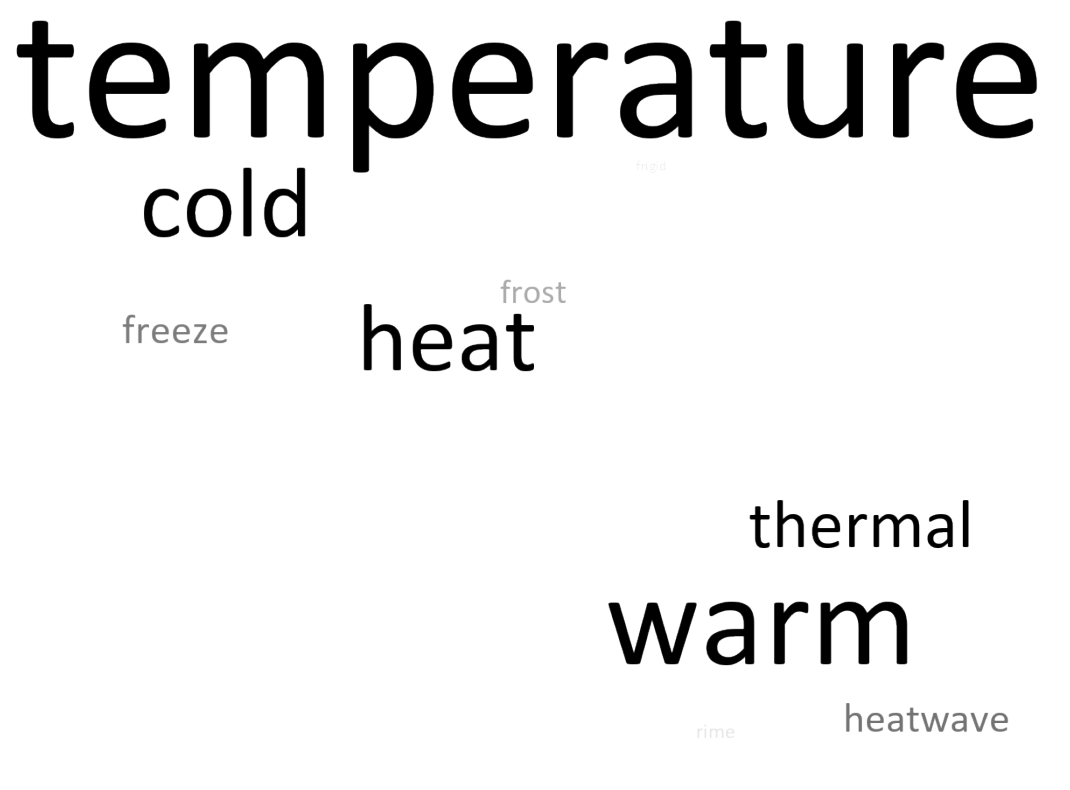

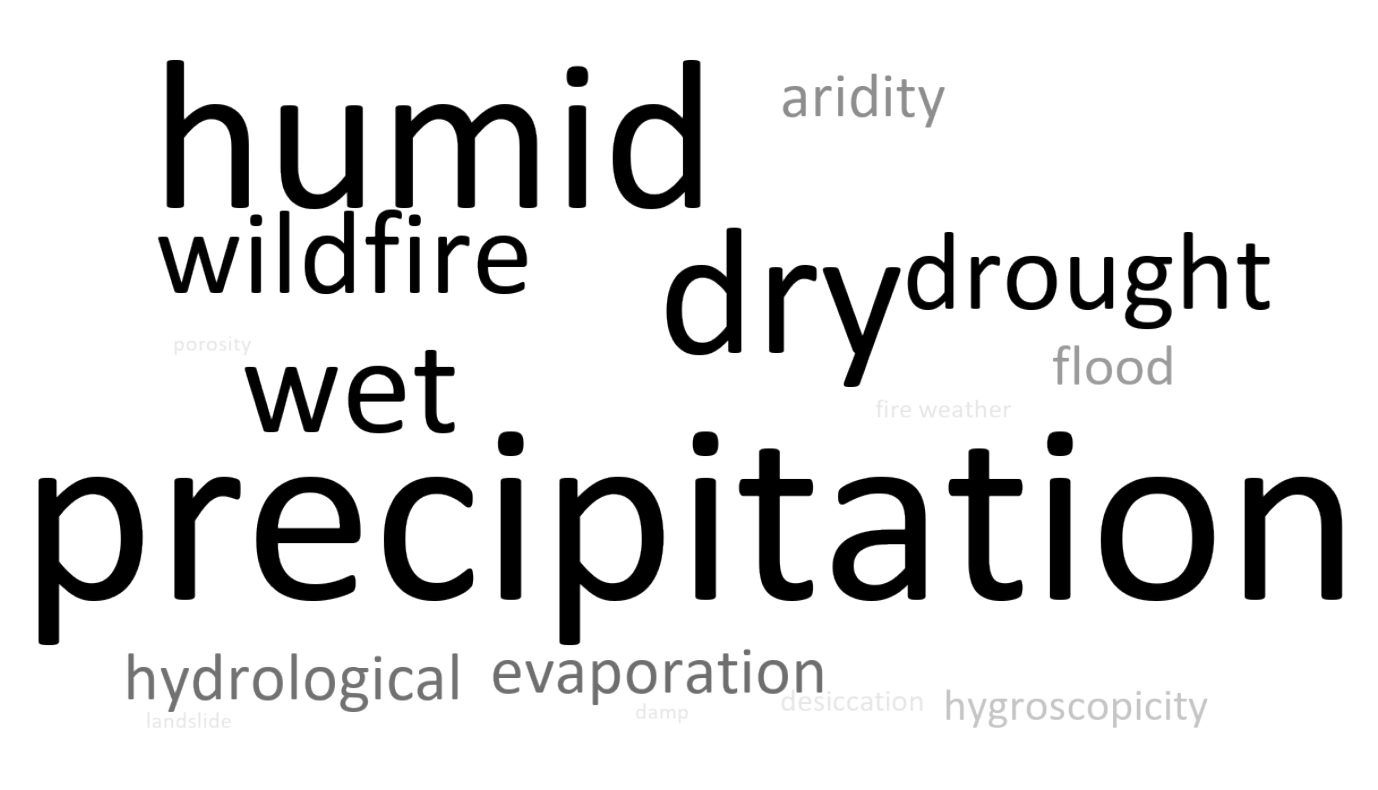

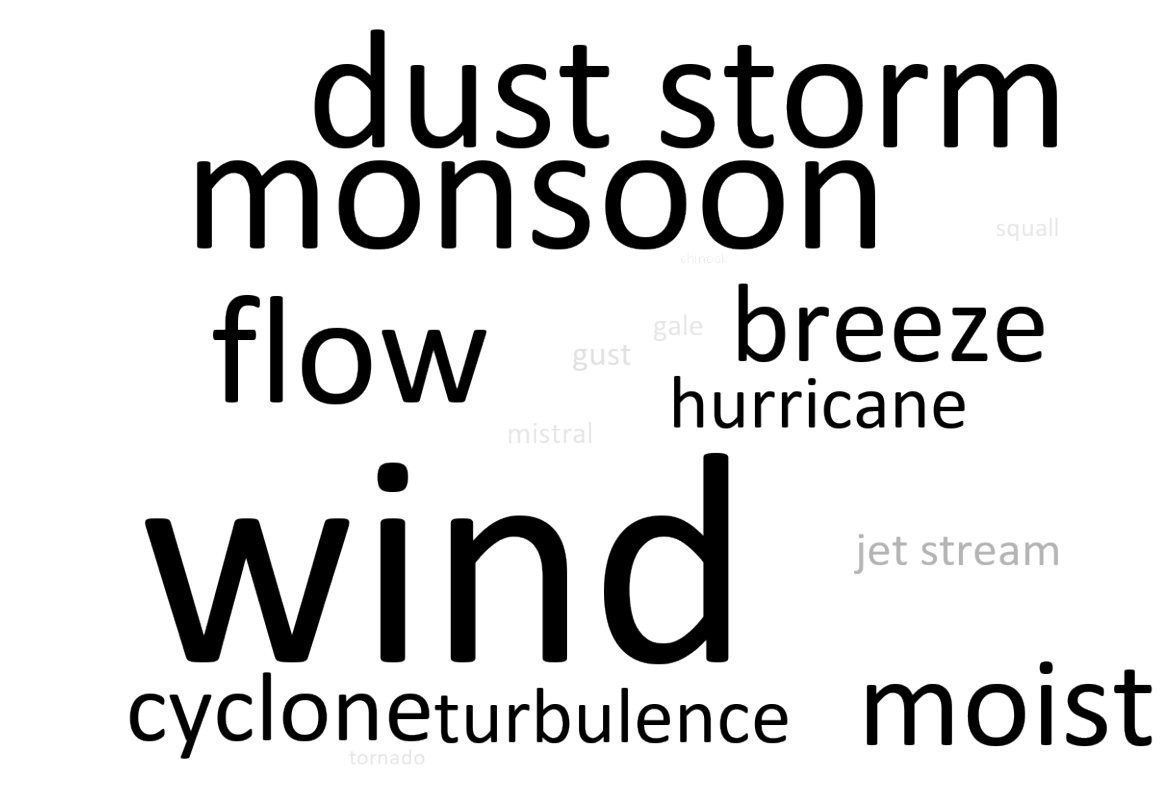

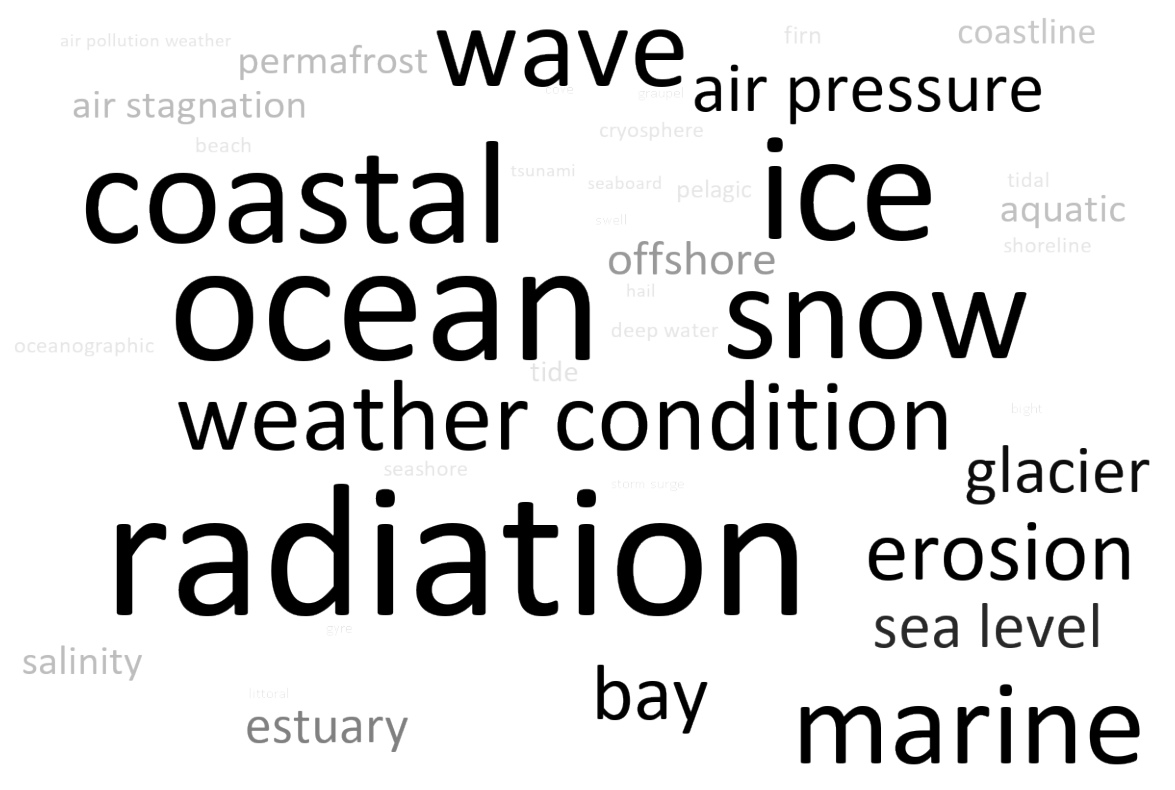

In [72]:
draw_word_cloud(climate_factors_count[climate_factors_count["id"] == 1], height=220, width=300, field="phrase", threshold=1, max_font_size=150, file_name="Driver_Heat_and_Cold")
draw_word_cloud(climate_factors_count[climate_factors_count["id"] == 2], height=170, width=300, field="phrase", threshold=1, max_font_size=60, file_name="Driver_Wet_and_Dry")
draw_word_cloud(climate_factors_count[climate_factors_count["id"] == 3], height=200, width=300, field="phrase", threshold=1, max_font_size=80, file_name="Driver_Wind")
draw_word_cloud(climate_factors_count[climate_factors_count["id"].isin([4,5,6,7,8])], height=200, width=300, field="phrase", threshold=1, max_font_size=50, file_name="Driver_Other")